# 10.4 텐서플로우를 이용하여 단순 RNN 모델 만들기
***

In [1]:
import numpy as np

size, seq_len = 100, 3

# 비어있는 넘파이 배열 생성
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

for i in range(size):
    # [0, 0.1, 0.2], [0.1, 0.2, 0.3] 같은 시퀀스 생성
    c = np.linspace(i/10., (i+seq_len-1)/10., seq_len)
    # 새로운 축 한개 추가
    X[i] = c[:, np.newaxis]
    # 목표값 생성
    Y[i] = (i+seq_len) / 10
    
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]] 0.3
[[0.1]
 [0.2]
 [0.3]] 0.4
[[0.2]
 [0.3]
 [0.4]] 0.5
[[0.3]
 [0.4]
 [0.5]] 0.6
[[0.4]
 [0.5]
 [0.6]] 0.7
[[0.5]
 [0.6]
 [0.7]] 0.8
[[0.6]
 [0.7]
 [0.8]] 0.9
[[0.7]
 [0.8]
 [0.9]] 1.0
[[0.8]
 [0.9]
 [1. ]] 1.1
[[0.9]
 [1. ]
 [1.1]] 1.2
[[1. ]
 [1.1]
 [1.2]] 1.3
[[1.1]
 [1.2]
 [1.3]] 1.4
[[1.2]
 [1.3]
 [1.4]] 1.5
[[1.3]
 [1.4]
 [1.5]] 1.6
[[1.4]
 [1.5]
 [1.6]] 1.7
[[1.5]
 [1.6]
 [1.7]] 1.8
[[1.6]
 [1.7]
 [1.8]] 1.9
[[1.7]
 [1.8]
 [1.9]] 2.0
[[1.8]
 [1.9]
 [2. ]] 2.1
[[1.9]
 [2. ]
 [2.1]] 2.2
[[2. ]
 [2.1]
 [2.2]] 2.3
[[2.1]
 [2.2]
 [2.3]] 2.4
[[2.2]
 [2.3]
 [2.4]] 2.5
[[2.3]
 [2.4]
 [2.5]] 2.6
[[2.4]
 [2.5]
 [2.6]] 2.7
[[2.5]
 [2.6]
 [2.7]] 2.8
[[2.6]
 [2.7]
 [2.8]] 2.9
[[2.7]
 [2.8]
 [2.9]] 3.0
[[2.8]
 [2.9]
 [3. ]] 3.1
[[2.9]
 [3. ]
 [3.1]] 3.2
[[3. ]
 [3.1]
 [3.2]] 3.3
[[3.1]
 [3.2]
 [3.3]] 3.4
[[3.2]
 [3.3]
 [3.4]] 3.5
[[3.3]
 [3.4]
 [3.5]] 3.6
[[3.4]
 [3.5]
 [3.6]] 3.7
[[3.5]
 [3.6]
 [3.7]] 3.8
[[3.6]
 [3.7]
 [3.8]] 3.9
[[3.7]
 [3.8]
 [3.9]] 4.0
[[3.8]
 [3.9

In [2]:
!pip install tensorflow
!pip install numpy --upgrade

In [3]:
import tensorflow as tf
# units는 SimpleRNN  레이어에 있는 뉴런의 수
# return_sequences는 출력으로 시퀀스 전체를 출력할지 묻는 옵션
# input_shape [3, 1]에서 3는 timesteps, 1은 입력차원
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 20, return_sequences=False,
                             input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


# 10.5 RNN을 학습시켜 예측을 해 보자.
***

Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 38.4993
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 35.8116
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 33.4119
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 31.0492
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 28.8343
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 26.8332
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 24.9869
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 23.2319
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 21.5197
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 19.9369
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 18.5283
Epoch 12/300
4/4 [==============================] - 0s 1ms/step - loss: 17.1081
Epoch 13/300
4/4 [==============================]

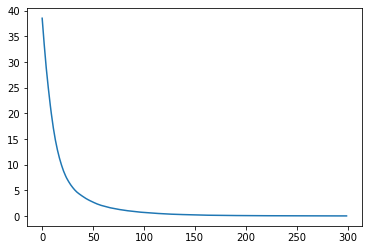

4/4 [==============================] - 0s 1ms/step


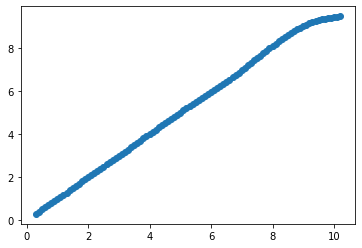

In [4]:
import matplotlib.pyplot as plt
history = model.fit(X, Y, epochs=300)
plt.plot(history.history['loss'])
plt.show()
y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

In [5]:
print(model.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model.predict(np.array([[[10.4], [10.5], [10.6]]])))

1/1 [==============================] - 0s 15ms/step
[[9.524647]]
1/1 [==============================] - 0s 14ms/step
[[9.541207]]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 1s 3ms/step - loss: 19.9857
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 4.3709
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 4.3166
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 2.4473
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 2.6743
Epoch 6/300
4/4 [==============================] - 0s 2

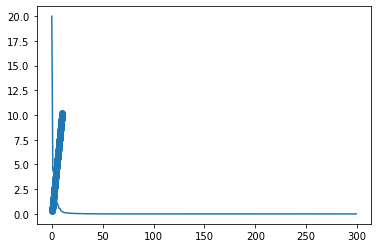

In [6]:
model1256 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 256, return_sequences = False,
                             input_shape = [3, 1]),
    tf.keras.layers.Dense(1)
])

model1256.compile(optimizer = 'adam', loss = 'mse')
model1256.summary()
history = model1256.fit(X, Y, epochs=300)

plt.plot(history.history['loss'])

y_hat = model1256.predict(X)
plt.scatter(Y, y_hat)

In [7]:
print(model1256.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model1256.predict(np.array([[[10.4], [10.5], [10.6]]])))

1/1 [==============================] - 0s 16ms/step
[[10.427634]]
1/1 [==============================] - 0s 15ms/step
[[10.59965]]


# 10.6 RNN을 다층구조로 만들어 적은 수의 파라미터로 좋은 성능을 내자
***

In [8]:
model_multilayer = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 34, input_shape=[3,1],
                             return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34),
    tf.keras.layers.Dense(1) 
])

model_multilayer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 3, 34)             1224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 34)                2346      
                                                                 
 dense_2 (Dense)             (None, 1)                 35        
                                                                 
Total params: 8,297
Trainable params: 8,297
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 2s 5ms/step - loss: 29.5125
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 14.6833
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 9.8734
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 7.5623
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 6.0230
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 4.9946
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 4.1510
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 3.3002
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 2.6133
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 2.0643
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 1.6942
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 1.4798
Epoch 13/300
4/4 [==============================] - 0s 4ms/

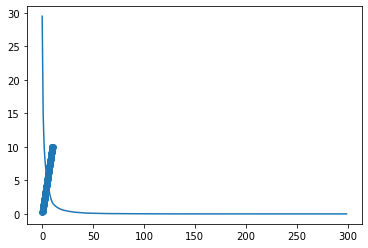

In [9]:
model_multilayer.compile(optimizer = 'adam', loss = 'mse')
history = model_multilayer.fit(X, Y, epochs=300)

plt.plot(history.history['loss'])

y_hat = model_multilayer.predict(X)
plt.scatter(Y, y_hat)

In [10]:
print(model_multilayer.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model_multilayer.predict(np.array([[[10.4], [10.5], [10.6]]])))

1/1 [==============================] - 0s 15ms/step
[[10.137786]]
1/1 [==============================] - 0s 14ms/step
[[10.179731]]
